<a href="https://colab.research.google.com/github/ECV21/data-science-portafolio/blob/main/Ejemplo_de_Proyecto_Reconocimiento_de_D%C3%ADgitos_Escritos_a_Mano.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Red neuronal usando PyTorch


El proyecto consiste en crear un una red neuronal que nos permita reconocer y clasificar dígitos (números) escritos a manos. Las imágenes que usaremos están en escala de grises de 28x28 pixeles, los cuales contendrán valores de 0 a 9.

El dataset MNIST (Modified National Institute of Standards and Technology) es uno de los conjuntos de datos que contiene imágenes de dígitos escritos a mano y se utiliza ampliamente para entrenar y probar modelos de clasificación de imágenes.

Características del dataset MNIST:

* Imágenes: Contiene 70,000 imágenes en escala de grises de dígitos escritos a mano.
* Entrenamiento: 60,000 imágenes.
* Prueba: 10,000 imágenes.
* Dimensiones:
  Cada imagen es de 28x28 píxeles, lo que equivale a 784 píxeles en total.
  Los valores de los píxeles varían de 0 (blanco) a 255 (negro).
* Etiquetas:
  Cada imagen está etiquetada con el dígito que representa (0-9).
  

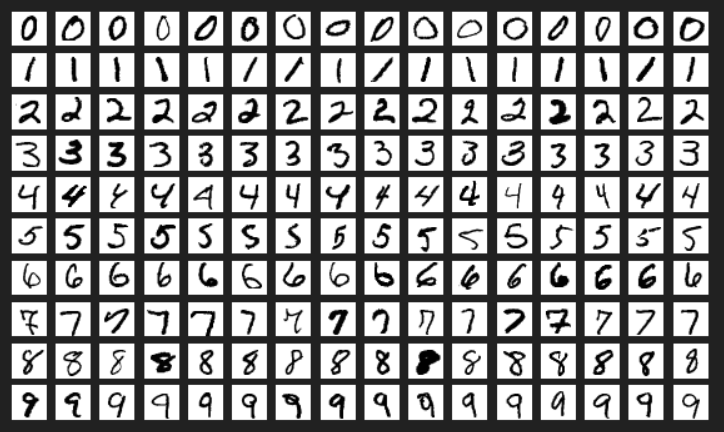

##¿qué es un tensor en una red neuronal?

Un tensor **es una estructura de datos similar a una matriz**, pero se puede tener más dimensiones. Los tensores permite representar datos y operar con ellos de manera eficiente. Pythorch y TensorFlow usan tensores para manejar las entradas, salidas y los parámetros del modelo.


Características de los tensores:
Dimensiones: Un tensor puede tener múltiples dimensiones, lo que lo hace más flexible que las matrices tradicionales.
* Escalar (0D): Un solo valor (e.g., 5).
* Vector (1D): Una lista de valores (e.g., [1, 2, 3]).
* Matriz (2D): Una tabla de valores (e.g., una imagen en escala de grises de 28x28 píxeles).


#Paso 1. Importación de librerías

In [7]:
# importar librerías


import torch #Librería de Pytorch, útil para trabajar con tensores
from torch import nn, optim #submódulo de PyTorch que contiene las clases y funciones necesarias para construir redes neuronales.
#DataLoader: Módulo que facilita la carga de datos en mini-lotes
from torch.utils.data import DataLoader
#Módulos de torchvision que permiten cargar conjuntos de datos y aplicar transformaciones a las imágenes.
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

# Paso 2. Descargar el data set

Usaremos el data set MNIST, contiene un total del 60,000 imágenes, cada uno con un dígito entre 0 y 9 escrito a mano. Cada imágen tiene su categoría correspondiente (entre 0 y 9)

Configura y carga el conjunto de datos MNIST, aplicando una transformación para convertir las imágenes a tensores y luego los organiza en mini-lotes para facilita el manejo de los datos durante el entrenamiento y la evaluación

In [8]:
# Definir una transformación que nos convirta las imágenes a tensores
transform = transforms.Compose([transforms.ToTensor()]) #transforms.ToTensor(): Convierte las imágenes a tensores de PyTorch


# Descargar y cargar los datos(de test y training); y aplicamos la transformación antes señalada
train_dataset = datasets.MNIST(root='datos', train=True, transform=transform, download=True) #root='datos': Directorio donde se almacenarán los datos.
#train=True: Especifica que estamos descargando el conjunto de datos de entrenamiento
#transform=transform: Aplica la transformación definida anteriormente (convertir imágenes a tensores).
#download=True: Si los datos no están presentes en el directorio especificado, se descargarán.

test_dataset = datasets.MNIST(root='datos', train=False, transform=transform, download=True) #train=False: Especifica que estamos descargando el conjunto de datos de prueba


# Crear un DataLoader para el conjunto de datos de entrenamiento (DataLoader es una herramienta que permite cargar los datos en mini-lotes (batches))
train_loader = DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)# batch_size=64 significa que cada lote tendrá 64 imágenes
  # shuffle=True significa que los datos se mezclarán aleatoriamente en cada época

# Crear un DataLoader para el conjunto de datos de prueba
test_loader = DataLoader(dataset=test_dataset, batch_size=64, shuffle=False)# Aquí no se mezcla aleatoriamente porque es el conjunto de prueba

#Paso 3: Definir la Red Neuronal

In [10]:
# Determine if a GPU is available, otherwise use CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

El siguiente código **define una red neuronal que toma imágenes de 28x28(matriz de dos dimensiones), las convierte en vectores**(vector de 784 valores,luego converitr el anterior vector en otro vector de 512 valores-->512-->capa final convierte vector de 512 valores a vector de 10 valores), los procesa a través de varias capas para APRENDER PATRONES, y finalmente las CLASIFICA en categorías del 0 al 9.

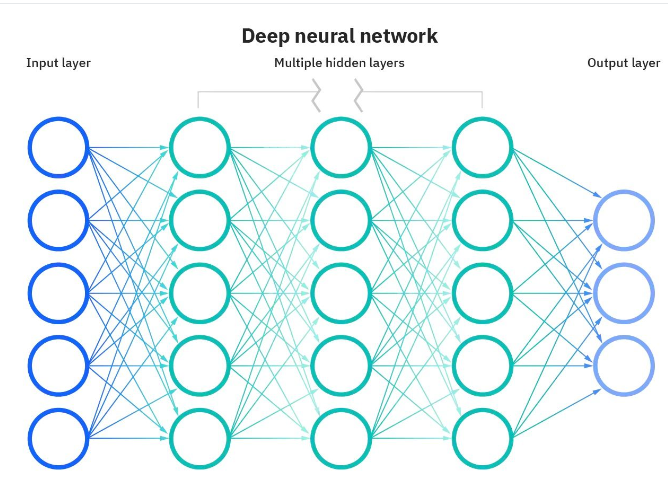

In [14]:
class NeuralNetwork(nn.Module):
    def __init__(self):
      """
      NeuralNetwork es una clase que hereda de nn.Module, la clase base en PyTorch para todos los módulos de red neuronal.
      nn.Module proporciona funcionalidades básicas y métodos necesarios para definir y entrenar redes neuronales.
      __init__ es un método especial que se llama cuando se crea una instancia de la clase.

      """
      super(NeuralNetwork, self).__init__() #lama al constructor de la clase base nn.Module.
      self.flatten = nn.Flatten() #Esta capa convierte una entrada de imagen de 28x28 píxeles (una matriz 2D)
        #en un vector unidimensional de tamaño 784 (28*28). Esto es necesario
        #porque las capas Linear en PyTorch esperan entradas en forma de vectores
      self.linear_relu_stack = nn.Sequential( #Definir secuencia de capas que agrupa varias capas en una sola
            nn.Linear(28*28, 512), #capa que mapea un vector de tamaño 784 a un vector de 512
            nn.ReLU(), #La función de activación ReLU (Rectified Linear Unit),
                        #Transforma cualquier valor negativo a cero y deja los valores positivos sin cambios.
            nn.Linear(512, 512), #otra capa de tamaño 512
            nn.ReLU(), #Otra función de activación ReLU.
            nn.Linear(512, 10) #CAPA final que MAPEA VECTOR de tamaño 512 a vector de tamaño 10
                                              #Esta capa es adecuada para la clasificación de 10 clases (por ejemplo, dígitos del 0 al 9).
        )


#Método Forward toma una imagen, por ejemplo, las convierte en un formato adecuado (VECTORES) para las capas lineas
  #las procesa através de varias capas para aprender caracterísitcas---> devuelve PUNTUACIONES de clase para cada posible categoría
    def forward(self, x): #toma una entrada X, es decir toma una imagen de 28x28 píxeles
        x = self.flatten(x) #convierte imagen de 28x28 a una vextor unidimenional de 784, útil porque las CAPAS esperan vactores, NO MATRICES
        logits = self.linear_relu_stack(x) #pasa el vector anterior através de una secuencia de capas: vector de 784-->vector de 512-->10
        return logits #devuelce salida del modelo; son valores numéricos que indica qué tan fuerte es la predicción del modelo para cada clase

model = NeuralNetwork().to(device)

#Paso 4: Definir la Función de Pérdida y el Optimizador

In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=1e-3)

#Paso 5: Entrenar el Modelo

In [ ]:
def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        # Hacer una predicción y calcular la pérdida
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

# Entrenar por varias épocas
epochs = 5
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(train_loader, model, loss_fn, optimizer)
print("¡Entrenamiento completado!")

Paso 6: Evaluar el Modelo

In [ ]:
def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

test(test_loader, model, loss_fn)